## Summary:

The **goal** in this project is **train a CNN model** that can take a picture of any mushroom and tell us with a high degree of confidence whether if it is an edible, a poisoness mushroom or neither (no_value mushroom).

Mushrooms represent an important food source and they are used extensively in cooking, in many cuisines (notably Chinese, Korean, European, and Japanese). Furthermore, many people enjoy mushroom collection as a outdoor activity. However, this activity, entails some health risk, since some species that are poisoness look similar to edible specimens. In the example below I present such case of similarity between a delicious and edible mushroom *Macrolepiota mastoidea* and a *Amanita phaloides* which ingestion can lead to death.

Hence, it is important to discern what mushrooms are safe to pick, and which entail some risk.

In this notebook, I will train an algorithm that can aid us with our picking mushroom dilema.

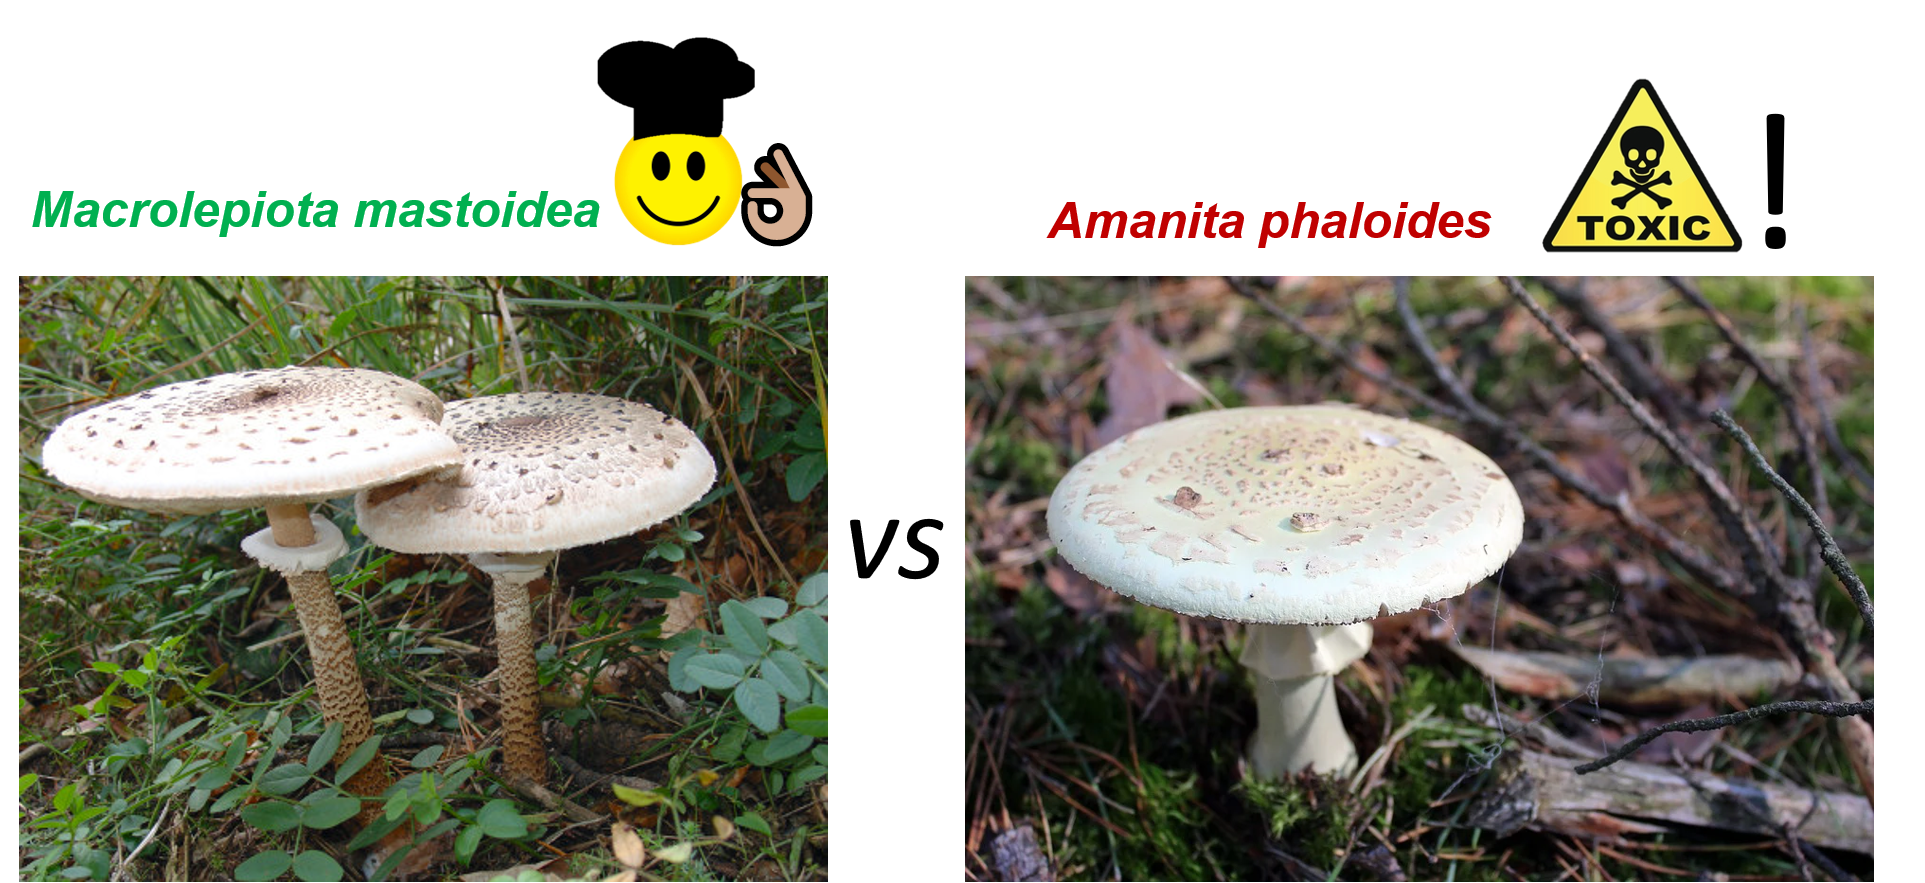

In [3]:
import PIL # image library tool

PIL.Image.open(r".\figures\edible_vs_toxic.png")

Import Neccesary Libraries

In [1]:
# Data Handling
import numpy as np
import pandas as pd
import random
import datetime as dt

# Data Scrapping
from bs4 import BeautifulSoup # to scrape pictures and data from different websites
import requests
import csv
import re
from simple_image_download import simple_image_download as simp # to easily scrape google images

# Image Library Tools
import cv2 # OpenCv: computer vision applications
from tensorflow.keras.preprocessing import image # we can use img = image.load_img(path, target_size=(,)) and image.img_to_array(img)
import pathlib # will be useful when reading the image paths
import PIL # image library tool
import glob
import os,sys

# Data Split and Data Preprocessing
import splitfolders # a library to re-structure the images into three subfolders(train/valid/test)
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator 

# Modeling
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_rows", 1000)

## 1. Scrape mushroom information and generate the picture dataset

This will be the most time consuming part. I will divide this task in several parts:

**1.1** Get all the scientific names for each class of mushroom (edible, toxic, no_value). I will use several websites and resources for this.

Good **candidate websites** for mushroom data scrapping:

* https://www.fungipedia.org/hongos.html
* https://www.wildfooduk.com/mushroom-guide/

**1.2** Use the scientific names to scrape pictures.

**1.3** Picture scrapping will be complemented with pictures from websites that list edible and poisoness mushrooms only. See websites below.

* https://www.cestaysetas.com/setas-toxicas-venenosas/ (information and pictures from toxic mushrooms)
* https://www.cestaysetas.com/setas-comestibles/ (information and pictures from edible mushrooms)
* http://www.foragingguide.com/mushrooms/in_season edible mushrooms
* https://en.wikipedia.org/wiki/Edible_mushroom eible mushrooms
* http://www.foragingguide.com/mushrooms/edible_by_latin_name edible mushrooms
* http://www.foragingguide.com/mushrooms/poisonous_by_latin_name toxic

**1.4** Kaggle resources: https://www.kaggle.com/maysee/mushrooms-classification-common-genuss-images

* The dictionary below was obtained from [governamental information](http://selvicultor.net/redfor/wp-content/uploads/Catalogo-variedades-comerciales-hongos_RedFor.pdf) about commercial mushrooms and non-commercial in Spain

In [5]:
dict_boe = {"edible" : 
 ["Agaricus campestris",
"Agaricus sylvaticus",
"Agrocybe aegerita",
"Amanita caesarea",
"Amanita ponderosa",
"Boletus aereus",
"Boletus edulis",
"Boletus pinophilus",
"Boletus reticulatus"
"Calocybe gambosa",
"Cantharellus cibarius",
"Cantharellus cinereus",
"Cantharellus lutescens",
"Cantharellus tubaeformis",
"Cantharellus subpruinosus",
"Clitocybe geotropa",
"Craterellus cornucopioides",
"Fistulina hepatica",
"Helvella sp",
"Higrocybe pratensis",
"Hydnum albidum",
"Hydnum repandum",
"Hydnum rufescens",
"Hygrophorus agathosmus",
"Hygrophorus gliocyclus",
"Hygrophorus latitabundus",
"Hygrophorus marzuolus",
"Hygrophorus penarius",
"Hygrophorus russula",
"Lactarius deliciosus",
"Lactarius quieticolor",
"Lactarius salmonicolor",
"Lactarius sanguifluus",
"Lactarius semisanguifluus",
"Lepista panaeolus",        
"Lepista nuda",
"Lepista personata",
"Macrolepiota procera",
"Marasmius oreades",
"Morchella sp",
"Pleurotus eryngii",
"Pleurotus ostreatus",
"Rhizopogon luteolus",
"Rhizopogon roseolus",
"Russula cyanoxantha",
"Russula virescens",
"Suillus luteus",
"Terfezia arenaria",
"Terfezia claveryi",
"Terfezia leptoderma",
"Tricholoma portentosum",
"Tricholoma terreum",
"Tuber aestivum",
"Tuber borchii",
"Tuber brumale",
"Tuber indicum",
"Tuber magnatum",
"Tuber melanosporum",
"Ustilago maydis",
"Xerocomus badius",
"Agaricus arvensis",
"Agaricus bisporus",
"Agaricus bitorquis",
"Agaricus blazei",
"Agaricus brunnescens",
"Agrocybe aegerita",
"Auricularia auricula-judae",
"Auricularia polytricha",
"Coprinus comatus",
"Flammulina velutipes",
"Grifola frondosa",
"Hericium erinaceus",
"Lentinula edodes",
"Lepista nuda",
"Lepista personata",
"Hypsizygus marmoreus",
"Hypsizygus tessulatus",
"Pholiota nameko",
"Pleurotus cystidiosus",
"Pleurotus cornucopiae",
"Pleurotus djamor",
"Pleurotus eryngii",
"Pleurotus fabellatus",
"Pleurotus nebrodensis",
"Pleurotus ostreatus",
"Pleurotus pulmonarius",
"Pleurotus sajor-caju",
"Pleurotus tuber-regium",
"Sparassis crispa",
"Stropharia rugosoannulata",
"Tremella fuciformis",
"Tremella mesenterica",
"Tricholoma caligatum",
"Volvariella volvacea"],
            
"no-edible": 
["Agaricus iodosmus",
"Agaricus moelleri",
"Agaricus placomyces",
"Agaricus xanthodermus",
"Amanita gemmata",
"Amanita muscaria",
"Amanita pantherina",
"Amanita phalloides",
"Amanita porrinensis",
"Amanita proxima",
"Amanita verna",
"Amanita virosa",
"Boletus lupinus",
"Boletus pulchrotinctus",
"Boletus rhodoxanthus",      
"Boletus satanas",
"Choiromyces meandriformis",
"Clitocybe acromelalga",
"Clitocybe alnetorum",
"Clitocybe amoenolens",
"Clitocybe candicans",
"Clitocybe cerussata",
"Clitocybe clavipes",
"Clitocybe dealbata",
"Clitocybe diatreta",
"Clitocybe ericetorum",
"Clitocybe festiva",
"Clitocybe gracilipes",
"Clitocybe nebularis",
"Clitocybe phyllophila",
"Clitocybe rivulosa",
"Conocybe",
"Coprinus atramentarius",
"Coprinus romagnesianus",
"Cortinarius",
"Entoloma lividum",
"Entoloma nidorosum",
"Entoloma niphoides",
"Entoloma rhodopolium",
"Entoloma vernum",
"Galerina sp",
"Gymnopilus sp",
"Gyromitra sp",
"Hebeloma crustuliniforme",
"Hebeloma sinapizans",
"Hypholoma fasciculare",
"Hypholoma sublateritium",
"Hygrocybe conica",
"Inocybe sp",
"Lactarius chrysorrheus",
"Lactarius helvus",
"Lactarius necator",
"Lactarius torminosus",
"Lepiota sp",
"Macrolepiota rachodes",
"Macrolepiota venenata",
"Mycena pura",
"Mycena rosea",
"Omphalotus illudens",
"Omphalotus olearius",
"Panaeolus sp",
"Paxillus filamentosus",
"Paxillus involutus",
"Pholiota squarrosa",
"Pholiotina sp",
"Pleurocybella porrigens",
"Pluteus nigroviridis",
"Pluteus salicinus",
"Psilocybe sp",
"Ramaria formosa",
"Russula emetica",
"Scleroderma sp",
"Stropharia aeruginosa",
"Stropharia coronilla",
"Stropharia cyanea",
"Stropharia semiglobata",
"Stropharia stercoraria",
"Tricholoma auratum",
"Tricholoma equestre",
"Tricholoma filamentosum",
"Tricholoma flavovirens",
"Tricholoma josserandii",
"Tricholoma pardinum",
"Tricholoma sulfureum",
"Tricholoma scioides",
"Tricholoma sejunctum",
"Tricholoma virgatum"]
}

In [42]:
len(dict_boe["edible"])

93

In [43]:
len(dict_boe["no-edible"])

87

Next I will scrape mode data from other websites using the beautiful soup library

* I will start with https://www.fungipedia.org/hongos.html which has 540 mushroom types classified in 

In [7]:
headers = requests.utils.default_headers()
headers.update({
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0',
})

In [8]:
website = "https://www.fungipedia.org/hongos.html?start=0"
source = requests.get(website, headers=headers).content
html_soup = BeautifulSoup(source, 'lxml')

In [9]:
html_soup.select("img.comest")[0]["title"]

'Abortiporus biennis - sin valor'

In [10]:
len(html_soup.select("img.comest"))

20

In [11]:
name_class = []

for i in list(range(0,540,20)):
    website = "https://www.fungipedia.org/hongos.html?start={}".format(i)
    source = requests.get(website, headers=headers).content
    html_soup = BeautifulSoup(source, 'lxml')
    
    for j in range(len(html_soup.select("img.comest"))):
        name = html_soup.select("img.comest")[j]["title"]
        name_class.append(name)

In [12]:
len(name_class)

540

In [13]:
name_class

['Abortiporus biennis - sin valor',
 'Adelphella babingtonii - sin valor',
 'Agaricus arvensis - buen comestible',
 'Agaricus campestris - buen comestible',
 'Agaricus litoralis - buen comestible',
 'Agaricus sylvaticus - buen comestible',
 'Agaricus sylvicola - buen comestible',
 'Agaricus urinascens - buen comestible',
 'Agaricus xanthodermus - toxica',
 'Agrocybe praecox - sin valor',
 'Alboleptonia sericella - sin valor',
 'Aleuria aurantia - comestible',
 'Amanita battarrae - comestible precaucion',
 'Amanita caesarea - excelente comestible',
 'Amanita ceciliae - comestible precaucion',
 'Amanita citrina - no comestible',
 'Amanita citrina var. alba - no comestible',
 'Amanita crocea - comestible precaucion',
 'Amanita curtipes - comestible',
 'Amanita excelsa - comestible',
 'Amanita franchetii - no comestible',
 'Amanita fulva - comestible precaucion',
 'Amanita gemmata - toxica',
 'Amanita muscaria - toxica',
 'Amanita muscaria var. aureola - toxica',
 'Amanita ovoidea - comest

In [14]:
df_mushrooms = pd.Series(name_class).str.split(" - ", expand=True)

In [15]:
df_mushrooms.columns = ["name", "class"]

In [16]:
df_mushrooms["class"].value_counts().sum()

540

In [17]:
def class_grouper(item):
    if item == "sin valor":
        return "no_value"
    elif item in ["comestible", "buen comestible", "excelente comestible", "comestible precaucion", "excelente comestible precaucion"]:
        return "edible"
    elif item in ["toxica", "mortal", "no comestible"]:
        return "toxic"

In [18]:
df_mushrooms["three_classes"] = df_mushrooms["class"].apply(class_grouper)

In [21]:
df_mushrooms["three_classes"].value_counts() #540 total ✔

no_value    243
edible      175
toxic       122
Name: three_classes, dtype: int64

* A similar classification is available in a website from UK (https://www.wildfooduk.com/mushroom-guide/). Lets scrape that data as well and combine the results

In [22]:
names = []
mushroom_classes = []
website = "https://www.wildfooduk.com/mushroom-guide/"
source = requests.get(website, headers=headers).content
html_soup = BeautifulSoup(source, 'lxml')

for i in range(len(html_soup.select("td.spotlight-text"))):
    name = html_soup.select("td.spotlight-text")[i].get_text(" ", strip=True)
    mushroom_class = html_soup.select("td.mushroom-icon")[i].img["alt"]
    names.append(name)
    mushroom_classes.append(mushroom_class)
    

In [23]:
columns_scrap = (list(zip(names, mushroom_classes)))

mushroom_uk = pd.DataFrame(columns_scrap, columns =["name", "classes"])


In [24]:
mushroom_uk["classes"].value_counts()

Edible       93
Poisonous    34
Inedible     18
Name: classes, dtype: int64

In [25]:
def class_grouper_uk(item):
    if item == "Inedible":
        return "no_value"
    elif item == "Edible":
        return "edible"
    elif item == "Poisonous":
        return "toxic"

In [26]:
mushroom_uk["classes"] = mushroom_uk["classes"].apply(class_grouper_uk)

In [27]:
df_mushrooms

name            class three_classes
0           Abortiporus biennis        sin valor      no_value
1        Adelphella babingtonii        sin valor      no_value
2             Agaricus arvensis  buen comestible        edible
3           Agaricus campestris  buen comestible        edible
4            Agaricus litoralis  buen comestible        edible
..                          ...              ...           ...
535  Volvopluteus gloiocephalus        sin valor      no_value
536   Xerocomellus chrysenteron       comestible        edible
537          Xylaria carpophila        sin valor      no_value
538           Xylaria hypoxylon        sin valor      no_value
539            Xylaria longipes        sin valor      no_value

[540 rows x 3 columns]

In [28]:
mushroom_uk

name classes
0                              Agaricus arvensis  edible
1                              Agaricus augustus  edible
2                             Agaricus bitorquis  edible
3                               Agaricus bohusii  edible
4                            Agaricus campestris  edible
..                                           ...     ...
140  Scleroderma citrinum, areolatum, verrucosum   toxic
141                             Sparassis crispa  edible
142                          Stropharia caerulea   toxic
143                           Tricholoma terreum   toxic
144                               Tuber aestivum  edible

[145 rows x 2 columns]

In [29]:
df = pd.merge(df_mushrooms,mushroom_uk,on=['name'], how='outer') 

In [30]:
df

name            class  \
0                            Abortiporus biennis        sin valor   
1                         Adelphella babingtonii        sin valor   
2                              Agaricus arvensis  buen comestible   
3                            Agaricus campestris  buen comestible   
4                             Agaricus litoralis  buen comestible   
..                                           ...              ...   
610                              Russula emetica              NaN   
611                               Russula fellea              NaN   
612                        Sarcoscypha austriaca              NaN   
613  Scleroderma citrinum, areolatum, verrucosum              NaN   
614                          Stropharia caerulea              NaN   

    three_classes classes  
0        no_value     NaN  
1        no_value     NaN  
2          edible  edible  
3          edible  edible  
4          edible     NaN  
..            ...     ...  
610           NaN   toxic  
611           NaN   toxic  
612           NaN  edible  
613           NaN   toxic  
614           NaN   toxic  

[615 rows x 4 columns]

In [31]:
df["three_classes"].fillna(df["classes"], inplace=True)

In [33]:
df_boe = pd.concat([pd.Series(dict_boe["edible"]),pd.Series(dict_boe["no-edible"])])

In [34]:
df_boe = df_boe.reset_index(drop=True)

In [35]:
df_boe = df_boe.reset_index()

In [46]:
df_boe[:93]

index                          0
0       0        Agaricus campestris
1       1        Agaricus sylvaticus
2       2          Agrocybe aegerita
3       3           Amanita caesarea
4       4          Amanita ponderosa
..    ...                        ...
88     88  Stropharia rugosoannulata
89     89        Tremella fuciformis
90     90       Tremella mesenterica
91     91       Tricholoma caligatum
92     92       Volvariella volvacea

[93 rows x 2 columns]

In [47]:
def edible_or_toxic(item):
    if item >= 0 and item < 93:
        return "edible"
    else:
        return "toxic"

In [48]:
df_boe["classes"] = df_boe["index"].apply(edible_or_toxic)

In [49]:
df_boe = df_boe.drop("index", axis=1)

In [50]:
df_boe.columns = ["name", "classes"]

In [51]:
df = pd.merge(df,df_boe,on=['name'], how='outer') 

In [52]:
df

name            class three_classes classes_x classes_y
0       Abortiporus biennis        sin valor      no_value       NaN       NaN
1    Adelphella babingtonii        sin valor      no_value       NaN       NaN
2         Agaricus arvensis  buen comestible        edible    edible    edible
3       Agaricus campestris  buen comestible        edible    edible    edible
4        Agaricus litoralis  buen comestible        edible       NaN       NaN
..                      ...              ...           ...       ...       ...
710  Tricholoma josserandii              NaN           NaN       NaN     toxic
711     Tricholoma pardinum              NaN           NaN       NaN     toxic
712    Tricholoma sulfureum              NaN           NaN       NaN     toxic
713     Tricholoma scioides              NaN           NaN       NaN     toxic
714     Tricholoma virgatum              NaN           NaN       NaN     toxic

[715 rows x 5 columns]

In [53]:
df["three_classes"].fillna(df["classes_y"], inplace=True)

In [54]:
df = df.drop(["class", "classes_x", "classes_y"], axis=1)

In [55]:
df["three_classes"].value_counts()

edible      260
no_value    257
toxic       198
Name: three_classes, dtype: int64

* Lastly I will scrape and combined data from the [wikipedia website](https://en.wikipedia.org/wiki/List_of_poisonous_fungus_species)

In [82]:
names_toxic = []
website = "https://en.wikipedia.org/wiki/List_of_poisonous_fungus_species"
source = requests.get(website, headers=headers).content
html_soup = BeautifulSoup(source, 'lxml')

for i in range(len(html_soup.select("i a"))):
    name = html_soup.select("i a")[i]["title"]
    names_toxic.append(name)

In [85]:
names_toxic = pd.Series(names_toxic).drop_duplicates()

In [94]:
names_toxic = names_toxic.reset_index(drop=True)

In [107]:
names_toxic = names_toxic.str.split("(", expand=True)[0]

In [160]:
names_edible = []
website = "https://en.wikipedia.org/wiki/Edible_mushroom"
source = requests.get(website, headers=headers).content
html_soup = BeautifulSoup(source, 'lxml')

for i in range(88):
    name = html_soup.select("li i a")[i]["title"]
    names_edible.append(name)

In [163]:
names_edible = pd.Series(names_edible).drop_duplicates()

In [164]:
names_edible = names_edible.reset_index(drop=True)

In [166]:
names_edible = names_edible.str.split("(", expand=True)[0]

In [170]:
len(names_edible)

80

In [171]:
len(names_toxic)

202

In [177]:
names_edible

0              Agaricus bisporus
1                      Pleurotus
2               Lentinula edodes
3     Auricularia auricula-judae
4           Volvariella volvacea
                 ...            
75      Coprinopsis atramentaria
76                      Coprinus
77                     Gyromitra
78                     Lactarius
79                 Lepista saeva
Name: 0, Length: 80, dtype: object

In [176]:
wiki_df[:80]

0              Agaricus bisporus
1                      Pleurotus
2               Lentinula edodes
3     Auricularia auricula-judae
4           Volvariella volvacea
                 ...            
75      Coprinopsis atramentaria
76                      Coprinus
77                     Gyromitra
78                     Lactarius
79                 Lepista saeva
Name: 0, Length: 80, dtype: object

In [174]:
wiki_df = pd.concat([names_edible, names_toxic]).reset_index(drop=True)

In [187]:
wiki_df = wiki_df.reset_index()

In [188]:
def edible_or_toxic(item):
    if item >= 0 and item < 80:
        return "edible"
    else:
        return "toxic"

In [189]:
wiki_df["classes"] = wiki_df["index"].apply(edible_or_toxic)

In [191]:
wiki_df.columns = ["index", "name", "classes"]

In [194]:
wiki_df = wiki_df.drop("index", axis=1)

In [196]:
df = pd.merge(df,wiki_df,on=['name'], how='outer') 

In [197]:
df

name three_classes classes
0       Abortiporus biennis      no_value     NaN
1    Adelphella babingtonii      no_value     NaN
2         Agaricus arvensis        edible  edible
3       Agaricus campestris        edible     NaN
4        Agaricus litoralis        edible     NaN
..                      ...           ...     ...
878     Conocybe subovalis            NaN   toxic
879     Marasmius collinus            NaN   toxic
880        Russula viscida            NaN   toxic
881   Tricholoma sulphureum           NaN   toxic
882    Tricholoma bufonium            NaN   toxic

[883 rows x 3 columns]

In [198]:
df["three_classes"].fillna(df["classes"], inplace=True)

In [200]:
df = df.drop("classes", axis=1)

In [206]:
df = df.drop_duplicates().reset_index(drop=True)

In [208]:
df["three_classes"].value_counts() # -%10, -20%

toxic       321
edible      286
no_value    257
Name: three_classes, dtype: int64

In [211]:
df = df.drop("Unnamed: 0", axis=1)

I need to perform some **data cleaning** on this df

In [371]:
df_mush = df.sort_values(["three_classes", "name"]).reset_index(drop=True).drop([12,13])

In [372]:
df_mush["name"] = df_mush["name"].str.replace("Boletus / ", "")

In [373]:
df_mush = df_mush.sort_values(["three_classes", "name"])

In [374]:
df_mush = df_mush.reset_index(drop=True)

In [375]:
df_mush.iloc[39, :]["name"] = "Calocybe gambosa"

In [376]:
df_mush.shape

(862, 2)

In [377]:
df_mush["name"] = df_mush["name"].str.lower()

In [378]:
df_mush = df_mush.drop_duplicates()

In [379]:
df_mush = df_mush.reset_index(drop=True)

In [380]:
df_mush.shape

(852, 2)

In [381]:
df_mush["name"] = df_mush["name"].str.capitalize()

In [385]:
df_mush = df_mush.drop(50).reset_index(drop=True)

In [394]:
df_mush = df_mush.drop([384, 549, 568, 646, 647, 714, 812,833, 840, 841, 850]).reset_index(drop=True)

Lets see what are the value counts for each name. Since I got the names from several resources there may be inconsistances.

In [24]:
df_mush["name"].value_counts()

Caloboletus radicans        2
Suillus bovinus             2
Chalciporus piperatus       2
Hortiboletus rubellus       2
Tylopilus felleus           2
                           ..
Coprinopsis ephemeroides    1
Agaricus augustus           1
Galerina sp                 1
Clitocybe rivulosa          1
Coprinus romagnesianus      1
Name: name, Length: 833, dtype: int64

Indeed, there are 7 mushrooms that appear in two groups at the same time. (Missclassifed as edible, toxic or no value). Lets inspects these cases.

In [22]:
list_misclassified = list(df_mush["name"].value_counts()[:7].index)

In [ ]:
df_mush["name"] = df_mush["name"].str.strip() # we need to take care os some spaces after the names since can yield duplicates

In [27]:
df_mush.loc[df_mush["name"].isin(list_misclassified)]

name three_classes
56   Chalciporus piperatus        edible
108  Hortiboletus rubellus        edible
174              Morchella        edible
237        Suillus bovinus        edible
294    Caloboletus calopus      no_value
295   Caloboletus radicans      no_value
395  Hortiboletus rubellus      no_value
500        Suillus bovinus      no_value
521      Tylopilus felleus      no_value
599    Caloboletus calopus         toxic
600   Caloboletus radicans         toxic
602  Chalciporus piperatus         toxic
744              Morchella         toxic
839      Tylopilus felleus         toxic

1) *Chalciporus piperatus* "**This mushroom is edible but very peppery**". [Source](https://en.wikipedia.org/wiki/Chalciporus_piperatus): Remove it from toxic list.

2) *Hortiboletus rubellus* "**There is some question over its edibility, and it is reportedly of poor quality with a taste of soap**". [Source](https://en.wikipedia.org/wiki/Hortiboletus_rubellus): Remove it from edible list.

3) Morchella. This is a genus with about 80 species. Overall highly appreciated. [Source](https://en.wikipedia.org/wiki/Morchella) Remove from toxic.

4) *Suillus bovinus*. It is an edible mushroom, though not highly regarded. [Source](https://en.wikipedia.org/wiki/Suillus_bovinus) Remove from no_value.

5) *Caloboletus calopus* [Source](https://en.wikipedia.org/wiki/Caloboletus_calopus) Although Caloboletus calopus is not typically considered edible due to an intensely bitter taste that does not disappear with cooking, there are reports of it being consumed in eastern Europe. Remove from toxic.

6) *Caloboletus radicans* "**Bitter and inedible, it can cause severe vomiting and diarrhoea if eaten**".[Source](https://en.wikipedia.org/wiki/Caloboletus_radicans) Remove from no_value.

7) *Tylopilus felleus* "Although **not poisonous**, it is generally considered inedible due to its overwhelming bitterness". [Source](https://en.wikipedia.org/wiki/Tylopilus_felleus). Remove from toxic.


In [50]:
df_mush = df_mush.drop([602, 108, 744, 500, 599, 295, 839]).reset_index(drop=True)
df_mush = df_mush.drop([255]).reset_index(drop=True) # remove also tuber since this is not exclusive for mushrooms

In [211]:
df_mush.to_csv("final_df_mush.csv", index=False)

In [196]:
df_mush = pd.read_csv("final_df_mush.csv")

In [212]:
df_mush.shape

(824, 2)

In [213]:
df_mush["three_classes"].value_counts() 

toxic       303
edible      268
no_value    253
Name: three_classes, dtype: int64

In [36]:
edible = list(df_mush.loc[(df_mush["three_classes"]=="edible")]["name"]) # scrape 400 pic each

In [187]:
toxic = list(df_mush.loc[(df_mush["three_classes"]=="toxic")]["name"]) 

In [38]:
no_value = list(df_mush.loc[(df_mush["three_classes"]=="no_value")]["name"]) 

**1.2** Use the scientific names to scrape pictures.

It took approximately 3 days to run the code below which resulted in **120 GB and a total of 322982 pictures**.

In [ ]:
response = simp.simple_image_download

from IPython.display import clear_output # we can use clear_output to print the progress in one single line

for i in range(len(list_all_names)):
    clear_output(wait=True)
    response().download('{}'.format(edible[i]), 400)
    perc=round((i/len(list_all_names))*100,1)
    print("Downloading pictures of {}. Overall Progress {}%".format(list_all_names[i], perc))

Downloading pictures of Xylaria longipes. Overall Progress 99.6%
[========================================================================] 100%

## 2. Prepare the picture dataset

**2.1**  First I will **re-size** all the pictures from the picture dataset to **350x350 pixels** since for training CNNs we dont need more than that. I will however, keep all full size pictures in a separate hard-drive for future use.

In [324]:
file_paths_all_pictures = glob.glob('images_mushrooms_dataset/*/*')

After this, we can use the loop through the list to open, resize and save each image in the directory.

In [302]:
start = dt.datetime.now()
for path in file_paths_all_pictures:
    try:
        img = PIL.Image.open(path)
        img = img.resize((350,350))
        img.save(path)
    except OSError:
        print(path) # if an error is encountered, print the path to know which picture is defective
finish = dt.datetime.now()

In [73]:
(finish-start).seconds/3600 # it took more than 3 hours to re-size all pictures

3.438888888888889

In [307]:
def image_look(): # we can use this func to take a look at random pictures
    return PIL.Image.open(file_paths_all_pictures[random.randint(1,329821)])

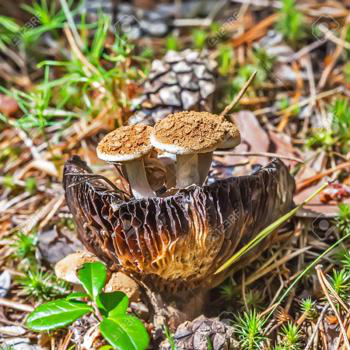

In [328]:
image_look()

We effectively reduced the size of the files from **120 GB to 10 GB** by re-sizing the pictures in the process

**2.2** We should try to be consistent and have all figures in the same format. Right now most of them are jpeg. Lets convert .png and .gif to jpeg

In [13]:
list_species_paths = glob.glob('images_mushrooms_dataset/*')

In [317]:
for path in list_species_paths:
    for filename in os.listdir(path):
        infilename = os.path.join(path,filename)
        if not os.path.isfile(infilename): continue
        oldbase = os.path.splitext(filename)
        newname = infilename.replace('.png', '1111.jpeg') # adding an extension that guarantees uniqueness
        output = os.rename(infilename, newname)

In [321]:
# have all the files the same extension?
len(glob.glob('images_mushrooms_dataset/*/*')) == len(glob.glob('images_mushrooms_dataset/*/*.jpeg'))

True

**2.3** Create a dict with the keys = names and values = paths of the pictures

In [9]:
df_mush = pd.read_csv("final_df_mush.csv")

In [10]:
list_all_names = list(df_mush["name"].str.replace(" ", "_"))

In [11]:
list_of_lists = []
for name in (list_all_names):
    paths = glob.glob('images_mushrooms_dataset/{}/*'.format(name))
    list_of_lists.append(paths)

Since both list follow the same order, we can simply use dict and zip to create the dictionary from the two lists

In [12]:
dict_mushrooms = dict(zip(list_all_names, list_of_lists))

Next, I will inspec the number of pictures obtained for each mushroom

In [13]:
number_pictures = []
for i in list_all_names:
    number_pictures.append(len(dict_mushrooms[i]))

In [14]:
df_number_pics = pd.DataFrame(list_all_names, number_pictures).reset_index()

In [15]:
df_number_pics.columns = ["number_pics", "name"]

In [16]:
df_number_pics["number_pics"].value_counts()

400    818
458      2
420      1
414      1
406      1
399      1
Name: number_pics, dtype: int64

In [17]:
df_number_pics.loc[df_number_pics["number_pics"] > 400] 
# for some species we ended up with more pictures for some reason but is a small difference. It shoulnt affect the end result

number_pics                 name
152          406     Leccinum_scabrum
257          458        Tuber_indicum
261          458   Tuber_mesentericum
604          414  Clitocybe_cerussata
728          420   Marasmius_collinus

* Lets also create a label dict to assign to each mushroom type a number

In [14]:
len(list_all_names)

824

In [15]:
mush_labels_dict = dict(zip(list_all_names, list(range(len(list_all_names)))))

In [7]:
# we can use PIL to quickly inspect elements.
def image_inspector(mushroom):
    if mushroom in list_all_names:
        return PIL.Image.open(dict_mushrooms[mushroom][random.randint(0,399)]) # picking a picture at random
    else:
        print("Could not find this mushroom")

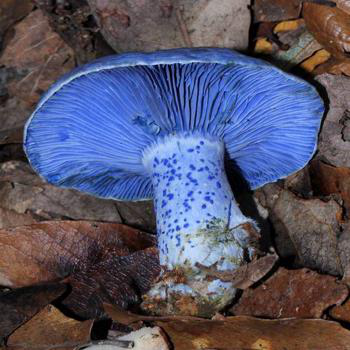

In [357]:
image_inspector("Lactarius_indigo")

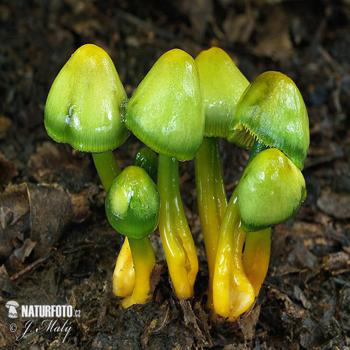

In [30]:
image_inspector("Gliophorus_psittacinus")

2.4 Since this is a large picture dataset we should Organize **train, test, and validation** image datasets into a consistent directory structure. I will use the [splitfolders library](https://pypi.org/project/split-folders/) for this.

    ├── test
    │   ├── mushroom_name
    │   │   └── name_01.jpg
    │   └── ...
    │       └── name_50.jpg
    ├── train
    │   ├── mushroom_name
    │   │   └── name_01.jpg
    │   └── ...
    │       └── name_300.jpg
    └── validation
        ├── mushroom_name
        │   └── name_01.jpg
        └── ...
            └── name_50.jpg


In [ ]:
splitfolders.ratio("images_mushrooms_dataset", output="data_organized", seed=42, ratio=(0.75, 0.125, 0.125)) 

## 3. Testing data Augmentation
* Let's test the effects of data augmentation on one of the pictures

In [3]:
img_size = 299
image_path = "data_organized/train/Rhodotus_palmatus/Rhodotus palmatus_3.jpeg"

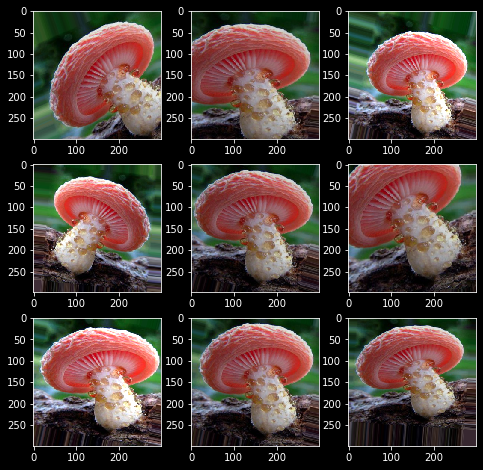

In [9]:
# load the image
img = image.load_img(str(image_path), target_size = (img_size,img_size)) 
# convert to numpy array
data = image.img_to_array(img)
# expand dimension to one sample
samples = np.expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(
        rotation_range=30, # value from 0 to 180 rotation
        width_shift_range=0.1,  # moving the pictures a fraction of the width (movement left right)
        height_shift_range=0.1,   # moving the pictures a fraction of teh height (movement up down) 
        brightness_range=[0.8, 1.2],
        shear_range=0.1,   # random cuts 
        zoom_range=0.25,   # in/out random zoom     
        horizontal_flip=True,   # flipping pictures horizontally. This could be for facial recognition. 
        fill_mode='nearest') # a strategy to fill in the pixels that we removed from the previous changes
# prepare iterator
it = datagen.flow(samples, batch_size=1)

plt.style.use("dark_background")
plt.rcParams["figure.figsize"] = (8,8)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	imag = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(imag)
# show the figure
plt.show()

Based on results from [this paper](https://ieeexplore.ieee.org/document/8506339), I chosed 3 Candidate Models for the transfer learning: **Xception**, **Inception V4** and **ResNextt50 + CBAM**. The first two use 299x299 input size, whereas the last uses 224x224

## 4. Select CNN models for transfer learning

Three different models, reported to have high accuracy, were selected for transfer learning. See this [paper](https://arxiv.org/abs/1810.00736) for model performance comparission. 

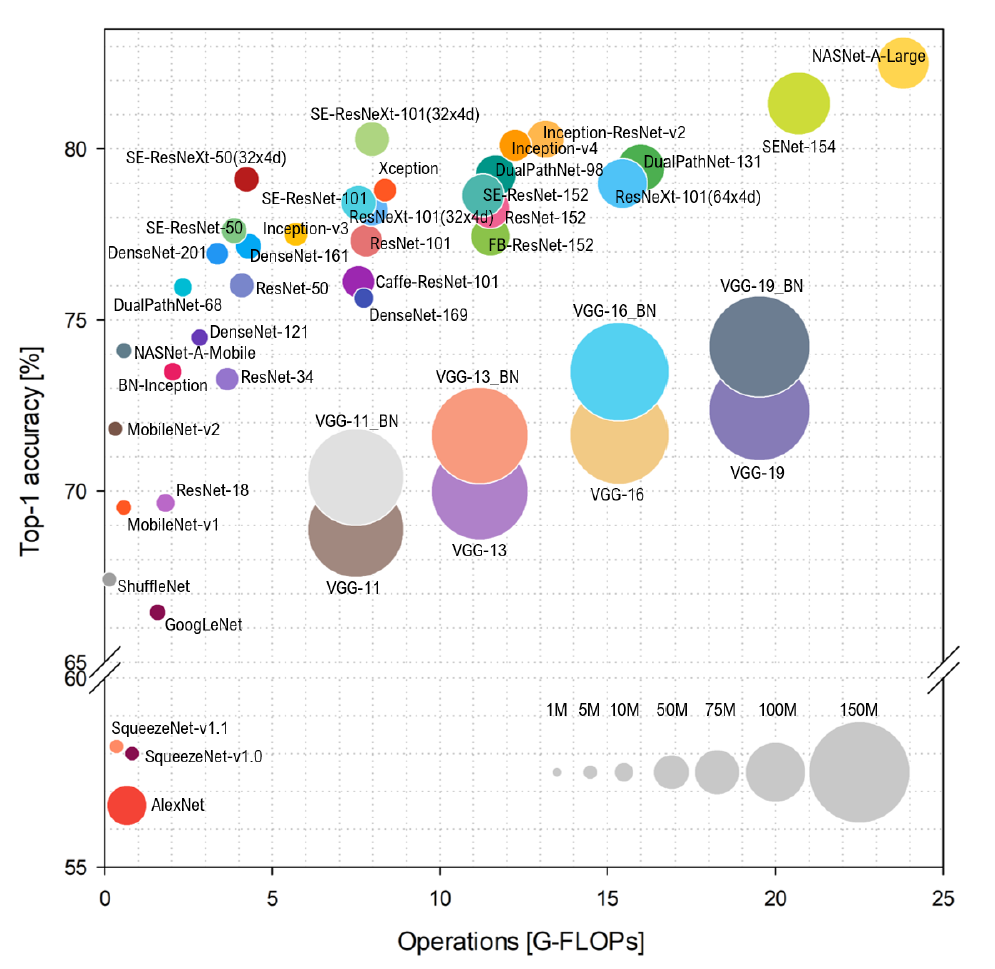

In [1]:
import PIL # image library tool

PIL.Image.open(r".\figures\image_classification_models.png")

## 5. ImageDataGenerator_*Xception*

* We will use the ImageDataGenerator class to progressively load the images for our picture dataset.
* Note: In this particular problem I will use categorical_crossentropy since our classes are not mutually exclusive, i.e. we care about close enough predictions. [See difference with sparse here](https://stackoverflow.com/questions/58565394/what-is-the-difference-between-sparse-categorical-crossentropy-and-categorical-c)

In [33]:
#Create training data generator
train_datagen = ImageDataGenerator(
        preprocessing_function=tf.keras.applications.xception.preprocess_input,
        rotation_range=40, # value from 0 to 180 rotation
        width_shift_range=0.1,  # moving the pictures a fraction of the width (movement left right)
        height_shift_range=0.1,   # moving the pictures a fraction of teh height (movement up down) 
        brightness_range=[0.8,1.2],
        shear_range=0.2,   # random cuts 
        zoom_range=0.2,   # in/out random zoom     
        horizontal_flip=True,   # flipping pictures horizontally. This could be for facial recognition. 
        fill_mode='nearest') # a strategy to fill in the pixels that we removed from the previous changes

train_generator = train_datagen.flow_from_directory(
        'data_organized/train/', #directory that contains training data
        target_size=(img_size, img_size), #what size image we want
        batch_size=16, #how many files to read in at a time
        class_mode="categorical")

Found 247310 images belonging to 824 classes.


In [34]:
# Create validation data generator

val_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.xception.preprocess_input)

val_generator = val_datagen.flow_from_directory(
        'data_organized/val/',
        target_size=(img_size, img_size),
        batch_size=16,
        class_mode="categorical")


Found 41212 images belonging to 824 classes.


In [35]:
#Create validation test generator

test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.xception.preprocess_input)

test_generator = test_datagen.flow_from_directory(
        'data_organized/test/',
        target_size=(img_size, img_size),
        batch_size=1,
        class_mode="categorical",
        shuffle=False)

Found 41229 images belonging to 824 classes.


* Once the iterators have been prepared, we can use them when fitting and evaluating a deep learning model.

## 6. Create the CNN architecture and train the model - 1st. *Xception*

* I will start testing the **Xception model** for transfer learning.

Next let’s load an Xception model, pretrained on ImageNet. 

We will exclude the top of the network by setting include_top=False: **this excludes the
global average pooling layer and the dense output layer**. 


In [36]:
base_model_xception = keras.applications.Xception(weights='imagenet', input_shape=(299, 299, 3), include_top=False) 

Next we freeze the xception layers 

In [37]:
# 2) Freeze

# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here. 👀

base_model_xception.trainable = False

We then add our own global average pooling layer, based on the output of the base model, followed by a dense output layer with one unit per class, using the softmax activation function. Finally, we create the Keras Model:

In [38]:

x = base_model_xception.output
x = keras.layers.GlobalAveragePooling2D()(x) # 
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(2048, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)  # Regularize with dropout
x = keras.layers.Dense(1024, activation="relu")(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout

predictions = keras.layers.Dense(824, activation="softmax")(x)

model_xception = keras.Model(inputs=base_model_xception.input, outputs=predictions)

model_xception.summary()


Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

In [39]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mushroom_model_xception.h5", save_best_only=True)

In [ ]:
# 1) No train any of the Xception layers -> Allow a first round of epocs 
base_model_xception.trainable = False


# 2) During the second round of epocs we can train all the xception layers

# Unfreeze the base_model. Note that it keeps running in inference mode
# since we passed `training=False` when calling it. This means that
# the batchnorm layers will not update their batch statistics.
# This prevents the batchnorm layers from undoing all the training
# we've done so far.
#base_model.trainable = True



learning_rate=0.001 # 0.0001, 0.00001

model_xception.compile(loss="categorical_crossentropy", # labels = one-hot-encoded
              optimizer=keras.optimizers.Adam(lr=learning_rate, decay=learning_rate/10), # 0.0001 for second round, # 0.00001 for third round
              metrics=["categorical_accuracy"])


fit_history_xception = model_xception.fit(
        train_generator, #train data generator 
        steps_per_epoch=len(train_generator)//16,
        epochs=5,
        validation_data=val_generator, #validation data generator 
        validation_steps=len(val_generator)//16,
        callbacks=[early_stopping_cb, checkpoint_cb])

## 7. Model Evaluation_*Xception*

## 8. ImageDataGenerator_*Inception_Resnet_V2*

In [33]:
#Create training data generator
train_datagen = ImageDataGenerator(
        preprocessing_function=tf.keras.applications.inception_resnet_v2.preprocess_input,
        rotation_range=40, # value from 0 to 180 rotation
        width_shift_range=0.1,  # moving the pictures a fraction of the width (movement left right)
        height_shift_range=0.1,   # moving the pictures a fraction of teh height (movement up down) 
        brightness_range=[0.8,1.2],
        shear_range=0.2,   # random cuts 
        zoom_range=0.2,   # in/out random zoom     
        horizontal_flip=True,   # flipping pictures horizontally. This could be for facial recognition. 
        fill_mode='nearest') # a strategy to fill in the pixels that we removed from the previous changes

train_generator = train_datagen.flow_from_directory(
        'data_organized/train/', #directory that contains training data
        target_size=(img_size, img_size), #what size image we want
        batch_size=16, #how many files to read in at a time
        class_mode="categorical")

Found 247310 images belonging to 824 classes.


In [34]:
# Create validation data generator

val_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_resnet_v2.preprocess_input)

val_generator = val_datagen.flow_from_directory(
        'data_organized/val/',
        target_size=(img_size, img_size),
        batch_size=16,
        class_mode="categorical")


Found 41212 images belonging to 824 classes.


In [35]:
#Create validation test generator

test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_resnet_v2.preprocess_input)

test_generator = test_datagen.flow_from_directory(
        'data_organized/test/',
        target_size=(img_size, img_size),
        batch_size=1,
        class_mode="categorical",
        shuffle=False)

Found 41229 images belonging to 824 classes.


## 9. Create the CNN architecture and train the model - 1st. *Inception-Resnet-V2*

In [ ]:
base_model = keras.applications.InceptionResNetV2(weights='imagenet', 
                                                  input_shape=(299, 299, 3),
                                                  include_top=False) 

In [ ]:
# Freeze layers

# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here. 👀

base_model_inception.trainable = False

In [ ]:
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x) # 
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(2048, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)  # Regularize with dropout
x = keras.layers.Dense(1024, activation="relu")(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout

predictions = keras.layers.Dense(824, activation="softmax")(x)

model = keras.Model(inputs=base_model.input, outputs=predictions)

model.summary()

In [42]:
model.save("my_mushroom_model.h5")

In [ ]:
model = keras.models.load_model("my_mushroom_model.h5")

In [62]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='black')
        plt.tight_layout()
        ax = plt.subplot(subplot)
        ax.set_facecolor('grey')
        ax.plot(training)
        ax.plot(validation)
        ax.set_title('model '+ title)
        ax.set_ylabel(title)
        ax.set_xlabel('epoch')
        ax.legend(['train', 'valid.'])
        #plt.savefig("Epocs_1-5.png", dpi=300, bbox_inches="tight")

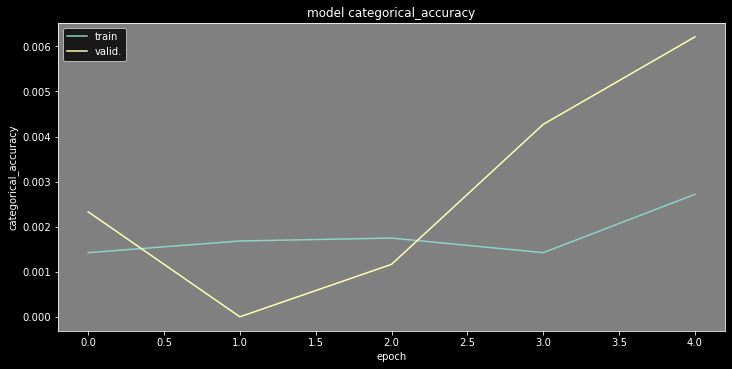

In [63]:
display_training_curves(fit_history.history['categorical_accuracy'], fit_history.history['val_categorical_accuracy'], 'categorical_accuracy', 211)
display_training_curves(fit_history.history['loss'], fit_history.history['val_loss'], 'loss', 212)

In [66]:
result  = model.evaluate(test_generator,steps=len(test_generator)//16)
print('Loss:', result[0])
print('Accuracy:', result[1])

2576/2576 [==============================] - 832s 323ms/step - loss: 6.5152 - categorical_accuracy: 7.7640e-04
Loss: 6.515159606933594
Accuracy: 0.000776397529989481


In [67]:
train_generator.class_indices

{'Abortiporus_biennis': 0,
 'Adelphella_babingtonii': 1,
 'Agaricus_arvensis': 2,
 'Agaricus_augustus': 3,
 'Agaricus_bisporus': 4,
 'Agaricus_bitorquis': 5,
 'Agaricus_blazei': 6,
 'Agaricus_bohusii': 7,
 'Agaricus_brunnescens': 8,
 'Agaricus_californicus': 9,
 'Agaricus_campestris': 10,
 'Agaricus_hondensis': 11,
 'Agaricus_iodosmus': 12,
 'Agaricus_langei': 13,
 'Agaricus_litoralis': 14,
 'Agaricus_menieri': 15,
 'Agaricus_moelleri': 16,
 'Agaricus_phaeolepidotus': 17,
 'Agaricus_placomyces': 18,
 'Agaricus_silvaticus': 19,
 'Agaricus_silvicola': 20,
 'Agaricus_urinascens': 21,
 'Agaricus_xanthodermus': 22,
 'Agrocybe_aegerita': 23,
 'Agrocybe_arenicola': 24,
 'Agrocybe_praecox': 25,
 'Alboleptonia_sericella': 26,
 'Aleuria_aurantia': 27,
 'Amanita_abrupta': 28,
 'Amanita_albocreata': 29,
 'Amanita_altipes': 30,
 'Amanita_aprica': 31,
 'Amanita_battarrae': 32,
 'Amanita_boudieri': 33,
 'Amanita_breckonii': 34,
 'Amanita_brunnescens': 35,
 'Amanita_caesarea': 36,
 'Amanita_ceciliae':

In [69]:
#Generate all predictions
filenames = test_generator.filenames
nb_samples = len(filenames)
predict = model.predict(test_generator,steps = nb_samples//16).argmax(axis=-1)

predict

array([718, 322, 609, ..., 535,  19, 535], dtype=int64)